# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

`sympy_10_polynomial.ipynb` も参考にすること。

In [2]:
from sympy import *
from IPython.display import display
init_printing()

# シンボル定義
x = Symbol('x')
y = Symbol('y')

# TODO

- 連立不等式
    - [GitHub にイシューあり](https://github.com/sympy/sympy/issues/13252)
    - [そのものずばりのイシュー](https://github.com/sympy/sympy/issues/13389)

# 多項式計算ができる

In [2]:
from sympy import Symbol
x = Symbol('x')
x + x + 1

In [5]:
display(x + x + 1)

In [6]:
display(x * x + 2 * x + 1)

### べき乗の記号
- $x^2$ は `x**2`
- $x^3$ は `x**3`
- 一般に $x^n$ は `x**n`

In [7]:
display(x**3 + 3 * x**2 + 3**x + 1)

In [8]:
display((x+1)**3)

一般の $n$ だと 2 項展開してくれない模様。やり方ある？

In [7]:
n = Symbol("n", integer=True)
p = (x+y)**n
display(p)
display(p.expand())

display(((x+y)**3).expand())

# 変数とシンボルのアルファベットは同じでなくてもいい

In [9]:
from sympy import Symbol

a = Symbol('x')
display(a + a + 1)

## 変数がどのアルファベットを表しているか調べる

In [10]:
x = Symbol('x')
display(a.name)
display(x.name)

'x'

'x'

## x, y のように 1 文字でなくてもいい

In [13]:
b = Symbol('test')
display(b.name)
display(b**2 + 2 * b + 1)

'test'

# 複数のシンボルを一気に定義できる

`x,y,z = symbols('x,y,z')` と書ける。

In [14]:
from sympy import symbols
x,y,z = symbols('x,y,z')
s = x * y + x * y
display(s)

### 簡単な計算なら処理してしまう

In [17]:
p = x * (x + x)
display(p)

### 少し複雑になると展開などを自動処理しない

もちろん  `expand()` や `factor()` など展開・因数分解してくれるメソッドはある。

In [18]:
p = (x + 2)*(x + 3)
display(p)

# factor, expand

In [19]:
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

### 因数分解

In [51]:
expr = x**2 - y**2
f_tmp = factor(expr)
display(expr)
print("->")
display(f_tmp)

->


### 展開

In [22]:
e_tmp = expand(f_tmp)
display(e_tmp)

## 多項式・有理式の割り算
$f(x) = x^2 + 4/x^2$, $g(x) = (x+2/x)^2$ として $g$ を $f$ で割った結果を考えよう.
`pdiv()` を使うといいようだ.

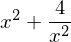

In [2]:
f = x**2 + 4/x**2
display(f)

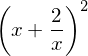

In [3]:
g = (x + 2/x)**2
display(g)

次のセルの結果は $g = f + 4$ を意味している。

In [4]:
display(pdiv(g, f))

### 3 次式

In [23]:
expr = x**3 + 3*x**2*y + 3*x*y**2 + y**3
factors = factor(expr)
display(factors)
display(expand(factors))

### 多項式の計算チェックに使おう

In [8]:
expr = (x+y)**4
display(expand(expr))

必ずしもサイクリックに書いてくれない（中高の教科書のような順番で書いてくれない）ので見づらいことがある。

In [12]:
from sympy import symbols
x,y,z = symbols('x,y,z')
expr = x**3 + y**3 + z**3 - 3 * x * y * z
display(expr)
print("→")
display(factor(expr))

→


順序指定法もあるにはあるが、うまいことやってくれる方法はあるだろうか？

- [公式の参考ページ](http://docs.sympy.org/latest/modules/polys/reference.html#orderings-of-monomials)

In [14]:
from sympy import init_printing
init_printing(order='grlex')

from sympy import symbols
x,y,z = symbols('x,y,z')
expr = x**3 + y**3 + z**3 - 3 * x * y * z
display(expr)
print("→")
display(factor(expr))

→


# prettyprint

http://docs.sympy.org/dev/tutorial/printing.html を見ると tex が入っていたりすると tex のタイプセットで出力してくれる模様。

このファイル冒頭にもある設定で TeX 出力したほうが見やすい.

In [25]:
from sympy import pprint
from sympy import Symbol
from sympy import factor, expand
x = Symbol('x')
y = Symbol('y')

expr = x*x + 2*x*y + y*y
print(expr)
pprint(expr)
display(expr)

x**2 + 2*x*y + y**2
 2            2
x  + 2⋅x⋅y + y 


In [27]:
expr = 1 + 2*x + 2*x**2
pprint(expr)
display(expr)

   2          
2⋅x  + 2⋅x + 1


## 多項式の順序反転
[公式のページ](http://docs.sympy.org/dev/tutorial/printing.html)を見るとオプションいろいろ書いてある。

In [28]:
from sympy import init_printing
init_printing(order='rev-lex')
display(expr)

# 級数の表示

降べきで並べる.

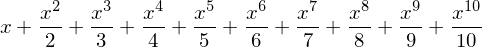

In [29]:
from sympy import Symbol, pprint, init_printing
def get_some_series(n):
    """n 次の適当な級数"""
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i

    return series

n = 10
series = get_some_series(int(n))

# 逆順プリントを強制
init_printing(order='rev-lex')
display(series)

# 代入

In [8]:
from sympy import Symbol, pprint
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y
display(expr)
res = expr.subs({x:1, y:2})
display(res)

### 文字も代入できる: 辞書で指定

In [31]:
display(expr.subs({x:1-y}))

# 多項式を単純化

In [32]:
from sympy import Symbol, pprint
from sympy import simplify
x = Symbol('x')
y = Symbol('y')

expr = x*x + x*y + x*y + y*y

expr_subs = expr.subs({x:1-y})
display(expr_subs)
display(simplify(expr_subs))

# 級数の評価

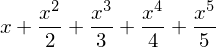

x = 3 での級数の値: 1707/20


In [9]:
from sympy import Symbol, pprint, init_printing
def get_some_series(n, x_value):
    """ある有限級数の表示"""
    x = Symbol('x')
    series = x
    for i in range(2, n + 1):
        series = series + (x ** i) / i
        
    return series


# Initialize printing system with reverse order
init_printing(order='rev-lex')

# 何項目まで表示させるか
n = 5
# 評価する x の値
x_value = 3

# 級数の値の評価
series = get_some_series(n, x_value)
display(series)
series_value = series.subs({x:x_value})
print('x = {0} での級数の値: {1}'.format(x_value, series_value))

# 文字列を式に

In [33]:
from sympy import sympify, pprint
init_printing(order='lex')
expr = "x**2 + 3*x + x**3 + 2*x"
expr = sympify(expr)
display(expr)

### 式全体を 2 倍にできる

In [34]:
display(2 * expr)

# 代数的に方程式を解く

グラフは下の方で具体的にコードを紹介している。

In [35]:
from sympy import Symbol, solve
x = Symbol('x')
expr = x - 5 - 7
sol = solve(expr)
display(sol)

## 二次方程式

In [36]:
from sympy import solve
x = Symbol('x')
expr = x**2 + 5*x + 4
display(solve(expr, dict=True))

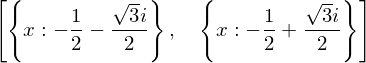

In [37]:
x = Symbol('x')
expr = x**2 + x + 1
display(solve(expr, dict=True))

## 一般の二次方程式

文字を含めて解いてくれる。
解の公式もお手の物。

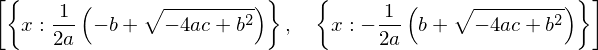

In [38]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
expr = a*x*x + b*x + c

display(solve(expr, x, dict=True))

## 一般の3次方程式

三次方程式には解の公式がある。
公式に虚数単位 $i$ が入っている。

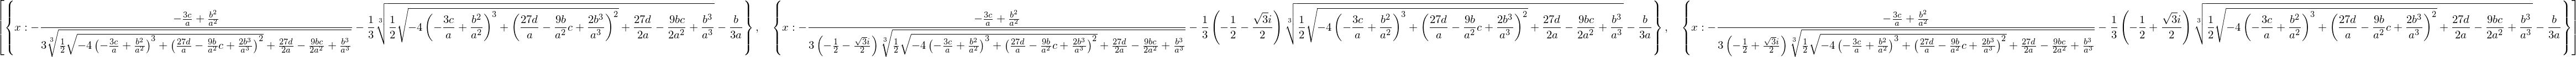

In [53]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
d = Symbol('d')
expr = a*x**3 + b*x**2 + c*x + d

display(solve(expr, x, dict=True))

## 4 次方程式

4 次方程式にもまだ解の公式がある。

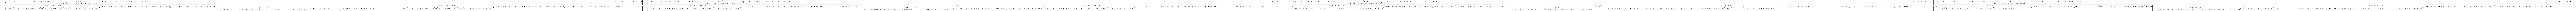

In [56]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
d = Symbol('d')
e = Symbol('e')
expr = a*x**4 + b*x**3 + c*x**2 + d*x + e

display(solve(expr, x, dict=True))

## 五次以上の方程式

5 次以上の方程式にはいわゆる解の公式が存在しない（ガロア理論）。

何を使ってもいいのなら、超幾何関数やテータ関数を使えば解の公式が出せる。

- [参考ツイートその1](https://twitter.com/paul_painleve/status/462782913042341889)
- [参考ツイートその2](https://twitter.com/Paul_Painleve/status/977066236184899584)

In [55]:
x = Symbol('x')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
d = Symbol('d')
e = Symbol('e')
f = Symbol('f')
expr = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

display(solve(expr, x, dict=True))

もちろん、具体的な5次方程式が解けるかどうかは別問題。

->


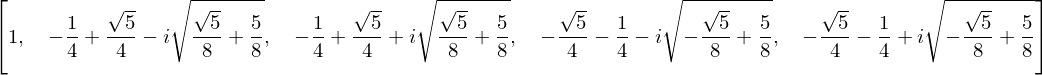

In [59]:
expr = x**5 - 1
display(expr)
print("->")
display(solve(expr))

一般の場合は解いてくれないようだ。

In [62]:
expr = x**5 + 3 * x + 1
display(expr)
display(solve(expr))

さらに高い次数でも簡単な方程式なら解いてくれる。

円分多項式はさすがに解いてくれた。

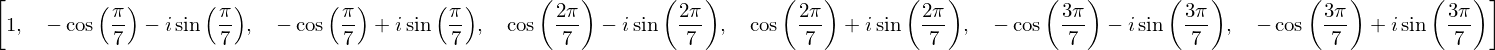

In [64]:
expr = x**7 - 1
display(expr)
display(solve(expr))

円分多項式に $x$ を追加しただけでも駄目だった。

In [10]:
expr = x**7 + x - 1
display(expr)
display(solve(expr))

## 連立一次方程式

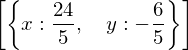

In [39]:
x = Symbol('x')
y = Symbol('y')
expr1 = 2*x + 3*y - 6
expr2 = 3*x + 2*y - 12
display(solve((expr1, expr2), dict=True))

### 連立方程式

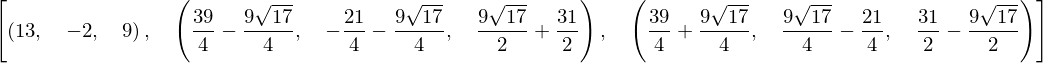

In [11]:
x, y, z = symbols('x y z')
expr1 = sympify(x * y * z + 234)
expr2 = sympify(x + y + z - 20)
expr3 = sympify(5 * x - y + 2 * z - 85)
display(expr1, expr2, expr3)
display(solve([expr1, expr2, expr3], [x, y, z]))

### 連立不等式

In [30]:
expr1 = "3*x + 5 > x + 1"
expr2 = "5*x - 6 <= 2*x + 3"
display(sympify(expr1))
display(sympify(expr2))
print("->")
display(solve([expr1, expr2]))

->


In [31]:
expr1 = sympify("x - 10 <= 8*x + 11")
expr2 = sympify("2*(x -1) + 1 > 5*x -4")
display(expr1)
display(expr2)
print("->")
display(solve([expr1, expr2]))

->


In [32]:
expr1 = sympify("9*x - 1 >= x + 15")
expr2 = sympify("x + 9 < 4*x - 3")
display(expr1)
display(expr2)
print("->")
display(solve([expr1, expr2]))

->


# Sympy を使ったプロット

[公式ページ](http://docs.sympy.org/latest/modules/plotting.html)も参考にすること。

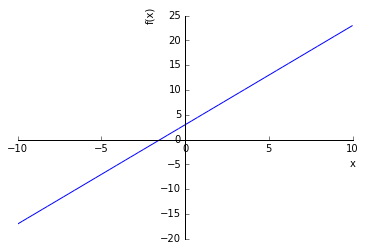

In [49]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2 * x + 3)

## 陰関数で円を描く

範囲指定もつけてある。

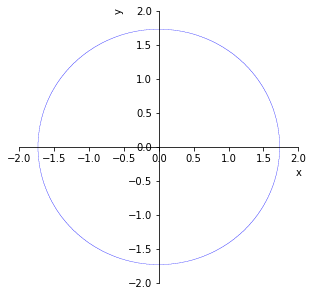

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)
plot_implicit(Eq(x**2 + y**2, 3),
                (x, -2, 2), (y, -2, 2))

色が薄い。

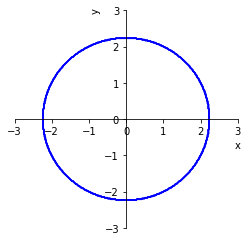

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (4,4)
plot_implicit(Eq(x**2 + y**2, 5),
                (x, -3, 3), (y, -3, 3), adaptive=False, contours)

### 領域の図示

`plot_implicit()` を使う。

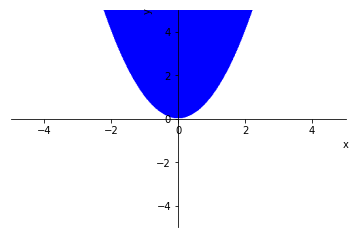

In [61]:
plot_implicit(y > x**2)

### TODO 複数の不等式を連立して出てくる領域

`SymPy 1.1.1` ではバグがある模様。

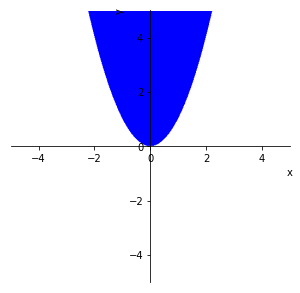

In [113]:
from sympy import plot_implicit, cos, sin, symbols, Eq, And, Or
plot_implicit(And(y > x**2, y > -x))

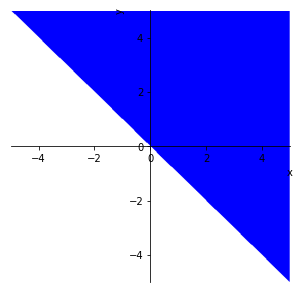

In [114]:
from sympy import plot_implicit, cos, sin, symbols, Eq, And, Or
plot_implicit(Or(y > x**2, y > -x))

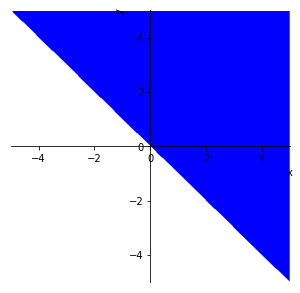

In [107]:
from sympy import plot_implicit, cos, sin, symbols, Eq, And, Or
plot_implicit(And(y > x, y > -x))

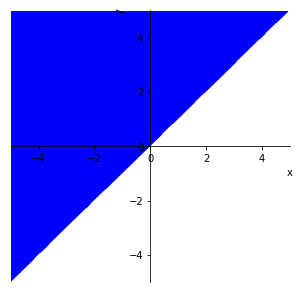

In [108]:
plot_implicit(Or(y > x, y > -x))

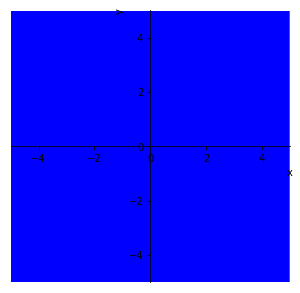

In [109]:
ineq1 = y > 5*x
ineq2 = y < x
ineq3 = y < x** 2 + 5
ineqs = [ineq1]
plot_implicit(And(ineq1, ineq2, ineq3))
#plot(ineq1, ineq2, ineq3)

### 円と直線の表示：別々に表示されてしまう

同じグラフに表示させる方法はこの次。

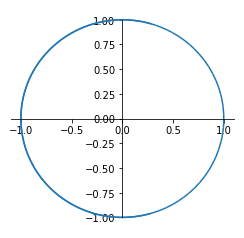

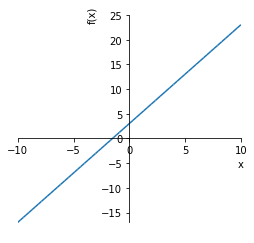

In [80]:
%matplotlib inline
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
u = symbols('u')

# 描画領域の修正：円がきちんと表示できるように
plt.rcParams['figure.figsize'] = (4,4)

p1 = plot_parametric(cos(u), sin(u), (u, -5, 5))
p2 = plot(2*x+3)
p1.append(p2[0])
p1

### 円と直線を重ねて描く

うまく動かない？
陰関数表示でうまく書けないか検討中。

<IPython.core.display.Javascript object>


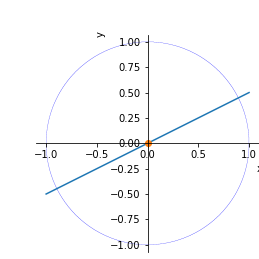

<IPython.core.display.Javascript object>


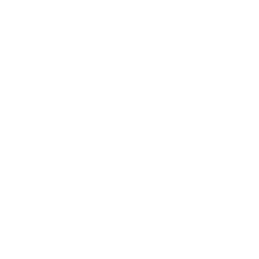

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sympy import *

x, y = symbols("x y")
hp = plot_implicit(Eq(x**2 + y**2, 1), (x, -1, 1), (y, -1, 1))
fig = hp._backend.fig
ax = hp._backend.ax
xx = yy = np.linspace(-1, 1)
ax.plot(xx,yy/2) # y = x
ax.plot([0],[0],'o') # Point (0,0)
ax.set_aspect('equal','datalim')
fig.canvas.draw()

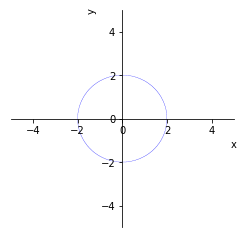

In [14]:
# 描画領域の修正：円がきちんと表示できるように
plt.rcParams['figure.figsize'] = (4,4)

#plot_implicit(x**2 + y**2>1)
p = plot_implicit(Eq(x**2 + y**2, 4))

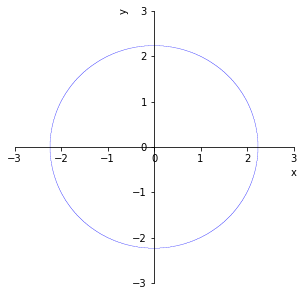

In [32]:
# 描画領域の修正：円がきちんと表示できるように
plt.rcParams['figure.figsize'] = (5, 5)
plot_implicit(Eq(x**2 + y**2, 5), (x,-3,3), (y, -3, 3))

### 放物線を複数重ねて書く

関数をリストにして、`plot()` にそのリストを食わせればいいようだ。

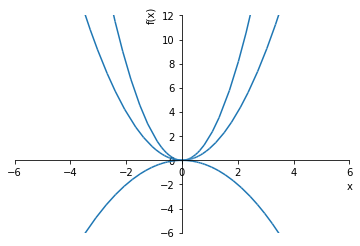

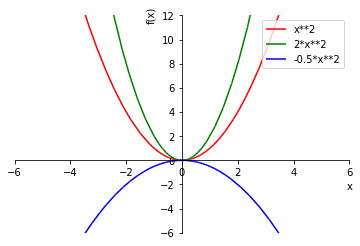

In [31]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
# y1 = x^2, y2 = 2x^2, y3 = -(1/2)x^2
y_1_2_3 = [x**2, 2*x**2, -(1/2)*x**2]

# 上のグラフ
# 3 つの 関数 y を一気に plot
plot(*y_1_2_3, xlim=(-6, 6), ylim=(-6, 12))

# plot の体裁を整える。
p = plot(*y_1_2_3,
            xlim=(-6, 6),
            ylim=(-6, 12),
            legend=True,
            show=False)

# 下のグラフ
p[0].line_color = 'r'
p[1].line_color = 'g'
p[2].line_color = 'b'
p.show()

### 楕円曲線

名前はごついが、ただの多項式。
暗号理論で大活躍。

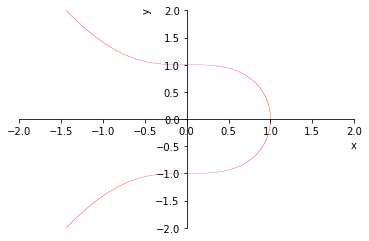

In [27]:
F = x**3 + y**2 -1
plot_implicit(F, (x, -2, 2), (y, -2, 2), line_color="r")

### 領域の色塗りもできる

楽で便利。
例としてはふたたび楕円曲線。

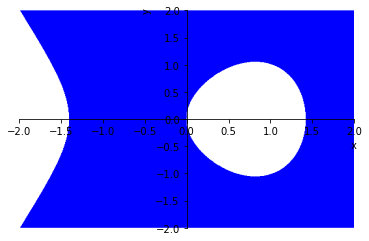

In [30]:
F = x**3 - 2 * x + y**2 > 0
display(F)
plot_implicit(F, (x, -2, 2), (y, -2, 2))

符号を反転。

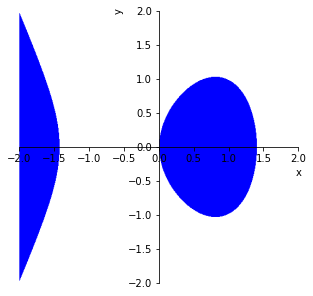

In [33]:
F = x**3 - 2 * x + y**2 < 0
display(F)
plot_implicit(F, (x, -2, 2), (y, -2, 2))

### 参考: `NumPy` で計算したグラフ

`NumPy` を使ったグラフも面白い。
3 次元も含めたサンプルは他の notebook にもある。

- [メモ](https://qiita.com/tibigame/items/0e48673179aeeab55a43)

## 2 変数の 3 次元プロット

グラフについては他にもいろいろある。
他のファイル参照。

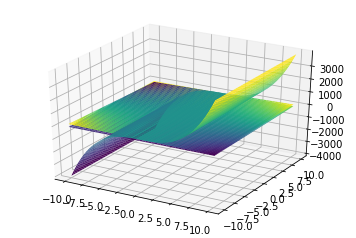

In [71]:
from sympy.plotting import plot3d
x, y = symbols('x y')
expr1 = sympify(x * y + 1)
expr2 = sympify(x + 4 * y**3 - 20)
plot3d(expr1, expr2, expr3)

## 定義域の制限

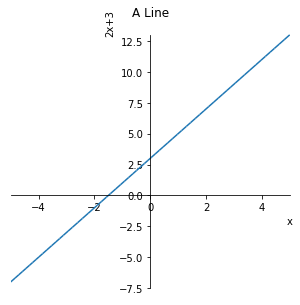

In [115]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol

# 描画領域の修正：円がきちんと表示できるように
plt.rcParams['figure.figsize'] = (5, 5)

x = Symbol('x')
plot(2 * x + 3, (x, -5, 5), title='A Line', xlabel='x', ylabel='2x+3')

## 陰関数の表示

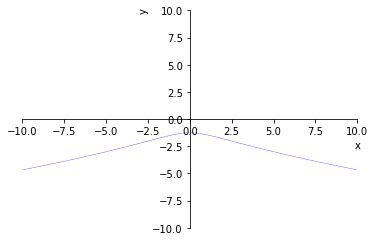

In [19]:
%matplotlib inline
from sympy import Symbol, sympify, solve
from sympy.plotting import plot

expr = "x**2 + y**3 + 2"
expr = sympify(expr)
display(expr)
plot_implicit(expr, (x, -10, 10), (y, -10, 10))

### $y$ について解く

3 次元グラフで虚数解も持っているので、図を見てもほとんど何もわからない。

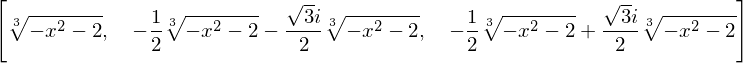

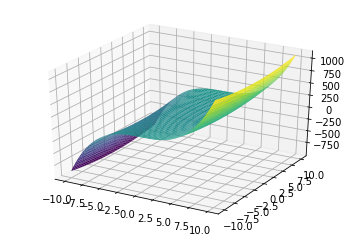

In [73]:
expr = "x**2 + y**3 + 2"
expr = sympify(expr)
display(expr)

y = Symbol('y')
solutions = solve(expr, y)
display(solutions)
expr_y = solutions[0]
plot3d(expr)

## 複数の関数のプロット

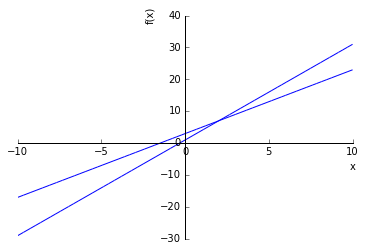

In [55]:
%matplotlib inline
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
plot(2*x+3, 3*x+1)

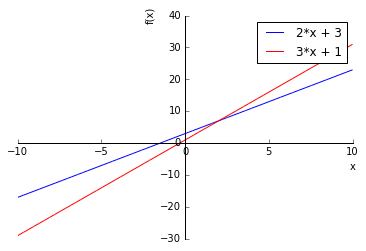

In [56]:
from sympy.plotting import plot
from sympy import Symbol
x = Symbol('x')
p = plot(2*x+3, 3*x+1, legend=True, show=False)
p[0].line_color = 'b'
p[1].line_color = 'r'
p.show()

## 不等式を解く

区間が求められるのでかなり使える.

下のブロックでは `isolve()` を作っているが、実際には `solve_poly_inequality()` を使っているだけ。

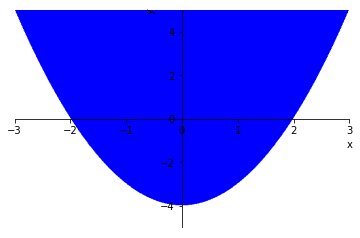

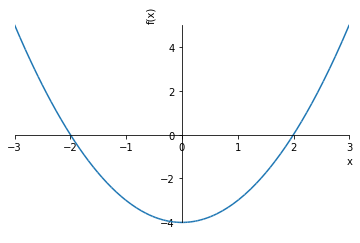

In [34]:
%matplotlib inline
from sympy import Symbol, sympify, SympifyError
from sympy import solve_poly_inequality, solve_rational_inequalities
from sympy import solve_univariate_inequality, Poly
from sympy.core.relational import Relational, Equality
def isolve(ineq_obj):
    """不等式を解く"""
    x = Symbol('x')
    # 不等式の左辺を取る
    expr = ineq_obj.lhs
    # 関係演算子の取得
    rel = ineq_obj.rel_op

    if expr.is_polynomial():
        # 式が多項式の場合
        p = Poly(expr, x)
        return solve_poly_inequality(p, rel)
    elif expr.is_rational_function():
        # 式が有理式の場合
        p1, p2 = expr.as_numer_denom()
        num = Poly(p1)
        denom = Poly(p2)
        return solve_rational_inequalities([[((num, denom), rel)]])
    else:
        return solve_univariate_inequality(ineq_obj , x, relational=False)

ineq = "x**2 - 4 > 0"
ineq_obj = sympify(ineq)
display(isolve(ineq_obj))
plot_implicit(y - x**2 + 4 > 0, (x,-3,3))
plot(x**2 - 4, (x, -3, 3))

# 多項式の積分

基本的なのは次式.
勝手に $n=-1$ の場合分けもやってくれる。
0 からの積分も無限大で適当に処理してくれている。

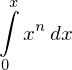

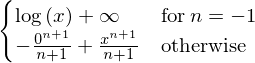

In [41]:
from sympy import symbols
x,y,n = symbols("x, y, n")
int = Integral(x**n, (x, 0, x))
display(int)
display(int.doit())

### `simplify`

$0$ は消える.

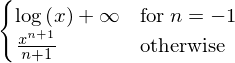

In [48]:
int = Integral(x**n, (x, 0, x))
display(simplify(int.doit()))

いくつか具体的にやってみる。

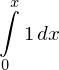

In [43]:
from sympy import symbols
x,y,n = symbols("x, y, n")
int = Integral(1, (x, 0, x))
display(int)
display(int.doit())

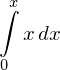

In [44]:
from sympy import symbols
x,y,n = symbols("x, y, n")
int = Integral(x, (x, 0, x))
display(int)
display(int.doit())

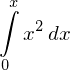

In [45]:
from sympy import symbols
x,y,n = symbols("x, y, n")
int = Integral(x**2, (x, 0, x))
display(int)
display(int.doit())

## 積分の線型性

「関数の和の積分」が「関数の積分の和」になる。

この「線型」は「線型代数」の線型の意味。

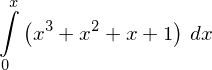

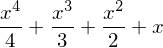

In [42]:
from sympy import symbols
x,y,n = symbols("x, y, n")
int = Integral(1 + x + x**2 + x**3, (x, 0, x))
display(int)
display(int.doit())

# 多項式の微分

基本的には積分の逆。
一般に $n$ で微分しているので表示がおかしくなる模様。

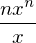

In [35]:
from sympy import symbols
x,y,n = symbols("x, y, n")
display(diff(x**n, x))

こちらも積分と同じく `simplify()`。

In [49]:
display(simplify(diff(x**n, x)))

## 高階の微分

$x^4$ を例に。

In [36]:
display(diff(x**4, x))
display(diff(x**4, x, x))
display(diff(x**4, x, x, x))